## Submission instructions:

*   Upload the code together with your comments in markdown in the form of an .ipynb to SuCourse by the due date. Name your submission BIO310-HW4-NameSurname.ipynb .
*   This is **not** a groups work. Work individually.
*   **Please, read every instruction/description in the homework, and follow each task, including the detailed inspection of the external links.**
*   Please follow the submission instructions, not adhering the submission standards will lead to point deduction.

## Quick Recap:
RNA-Seq is a powerful method used in molecular biology to study gene expression. It is a technique that allows scientists to measure the amount of RNA molecules produced by cells or tissues under different conditions.

To understand RNA-Seq, we first need to know what RNA is. RNA stands for Ribonucleic Acid, and it is a molecule that plays an important role in the process of gene expression. RNA acts as a messenger between DNA (the genetic material of the cell) and proteins (the functional molecules that perform many tasks in the cell).

RNA-Seq works by isolating RNA from cells or tissues and converting it into a complementary DNA (cDNA) library. This cDNA library is then sequenced using high-throughput sequencing technologies, which generate millions of short reads that represent the RNA molecules present in the sample.

Once the reads are generated, bioinformaticians use specialized software to analyze them and map them back to the genome or transcriptome of the organism being studied. This mapping step allows scientists to identify which genes are expressed in the sample and how much RNA is being produced by each gene.

RNA-Seq can provide insights into a variety of biological processes, such as gene regulation, cellular differentiation, and disease states. It has revolutionized the field of molecular biology and is now widely used in research labs around the world.

## Scenario (Exemplary):

We started by obtaining raw sequencing reads in .fastq format from the sequencing facility. Before analyzing the data, we performed Quality Control (QC) checks to ensure the quality of the reads. These checks included assessing the distribution of read lengths, looking for the presence of adapter sequences, and checking for the presence of any low-quality reads.

Once we were satisfied with the quality of the reads, we used software such as STAR to map the reads to a transcriptome. We then used software such as SALMON to quantify the expression levels of each transcript, which gave us the number of reads that mapped to each transcript in the transcriptome, and then we used transcript counts to aggregate to gene level expression.

Now, our data consists of gene level counts for each sample, and we are expected to analyze it.

## We will do the following:

**Firstly**, to get a quick overview of the samples, we will use a technique called Principal Component Analysis (PCA). This technique allows us to visualize the similarities and differences between the samples based on their gene expression profiles. It was a useful way to check if the samples clustered together based on the expected biological variables (e.g., organ type or treatment condition).

**Next**, we want to compare gene expression between different conditions, such as different organs or treatment conditions. To do this, we use a statistical method called differential gene expression analysis. This method compares the expression of each gene between two or more conditions and identified genes that were expressed differently. We used software such as DESeq2 to perform differential gene expression analysis.

**Finally**, once we have identified the differentially expressed genes, we wante to understand which biological pathways or processes were affected. We do this using gene set enrichment analysis, which compared the differentially expressed genes to known sets of genes involved in specific biological pathways or processes. We use software such as EnrichR or GSEA to perform gene set enrichment analysis.

## Info on data:

Sequencing libraries are created from total extracted mRNAs from different organs of healthy mice, after Cisplatin treatment or kept untreated.

## Info on condition:

Cisplatin is a chemotherapy drug commonly used to treat various types of cancer. It works by binding to DNA molecules in cancer cells and causing damage to the DNA strands. The damage caused by cisplatin can activate the cell's DNA repair mechanisms, including nucleotide excision repair (NER).

Nucleotide excision repair is a DNA repair mechanism that removes and replaces damaged nucleotides (the building blocks of DNA) in the DNA strand. NER is a multi-step process that involves the recognition and removal of damaged DNA, followed by the insertion of new nucleotides to repair the damage.

In the case of cisplatin treatment, the drug causes a specific type of DNA damage known as DNA crosslinking, where the two strands of DNA are covalently linked together. This type of DNA damage is particularly toxic and can lead to cell death if left unrepaired. NER plays a critical role in repairing this type of damage caused by cisplatin.

However, cancer cells can also develop resistance to cisplatin by altering their DNA repair mechanisms, including NER. Some cancer cells may overexpress certain proteins involved in NER, allowing them to repair the DNA damage caused by cisplatin more efficiently and survive the treatment.

Overall, the relationship between cisplatin and NER is complex and can have significant implications for the effectiveness of cisplatin chemotherapy in treating cancer. Understanding this relationship is important for developing new strategies to overcome cisplatin resistance and improve cancer treatment outcomes.

[RNA-seq Dataset Info](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE117167)

The modules we are going to use are as followed:
1. PyDESeq2: is for Differential gene expression analysis. It is Python implementation of DESeq2 library which is originally in R.
2. GSEApy: is a Python/Rust implementation of GSEA and wrapper for Enrichr. Enrichr contains most comprehensive and popular gene set libraries. We are going to use it for gene set enrichment over the selected libraries to see which biological pathways are enriched on up-regulated and down-regulated gene sets.

In [2]:
# After installing the below modules, dont forget to restart the runtime, as it needs to change the modules which the versions are changed.
!pip install --quiet numpy==1.23.0 pydeseq2 gseapy dash-bio

# This error is not a problem for our tasks:
# ERROR: pip's dependency resolver does not currently take into account all the packages that are installed.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 50.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 552.9/552.9 kB 39.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 74.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.4/122.4 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 80.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.2/20.2 MB 20.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 54.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 46.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the followin

After restarting the runtime, Import the following modules. If you dont restart, numpy will give an error.



In [3]:
import pandas as pd
import numpy as np
import copy
np.seterr(all="ignore")

# DGE and Pathway Enrichment
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats
import gseapy as gp
from gseapy import Biomart

# PCA
from sklearn.decomposition import PCA

# Viz.
import plotly.express as px
import dash_bio
from gseapy import dotplot

The following are helper functions for visualizations that are in DESeq2 but not in PyDESeq2 such as: Run PCA/plot, Volcano Plot, Dispersion Plot, MA Plot.

Run the following cell as we are going to need these functions in the downstream analysis.

In [4]:
def plotPCA(dds, clinical_df, nTop=0, vst=True, returnData=False):

  if vst:
    counts = dds.layers['vst_counts']
  else:
    counts = dds.layers['normed_counts']

  colwise_var = np.var(counts, axis=0)
  idx = np.argpartition(colwise_var, -nTop)[-nTop:] if nTop > 0 else (-colwise_var).argsort()[:]

  pca = PCA(n_components=3)
  pca_data = pca.fit_transform(counts[:, idx])
  print(f'Explained Variance Ratio :{sum(pca.explained_variance_ratio_)}')

  index_to_use = dds.obsm['design_matrix'].index
  pca_df = pd.DataFrame(
      {'pc1': pca_data[:,0],
       'pc2': pca_data[:,1],
       'pc3': pca_data[:,2],
       'organ': clinical_df.loc[index_to_use]['organ'],
       'condition': clinical_df.loc[index_to_use]['condition']})

  fig = px.scatter_3d(pca_df, x='pc1', y='pc2', z='pc3',
                    color='organ', symbol='condition')
  fig.show()

  if returnData:
    return pca, pca_data

def plotVolcano(stat_res, lfc_thr=[-1, 1], padj_thr=0.05):
  res_df = stat_res.results_df

  plot_df = res_df.dropna()
  plot_df = pd.DataFrame({
      'EFFECTSIZE': np.array(plot_df['log2FoldChange']).astype(float),
      'P': np.array(plot_df['padj']).astype(float),
      'GENE': list(plot_df.index)})

  fig = dash_bio.VolcanoPlot(
      dataframe=plot_df,
      snp=None,
      genomewideline_value=-np.log10(padj_thr),
      effect_size_line=lfc_thr,
      ylabel='-log10(Adjusted p-value)',
      xlabel='Effect Size: log2(fold-change)')

  fig.show()

def plotDispEsts(dds):
  gene_est = list(np.log(dds.varm['genewise_dispersions']))
  fit = list(np.log(dds.varm['fitted_dispersions']))
  final = list(np.log(dds.varm['dispersions']))
  n = len(gene_est)

  m_norm_counts = list(np.log(np.average(dds.layers['normed_counts'], axis=0)))

  plot_df = pd.DataFrame({
      'dispersion': gene_est + fit + final,
      'name': ['Genewise Dispersions'] * n + ['Fitted Dispersions'] * n + ['Final Dispersions'] * n,
      'mean_norm_counts': m_norm_counts * 3
  })

  fig = px.scatter(plot_df, y = 'dispersion', x = 'mean_norm_counts', color = 'name', opacity=0.8)
  fig.show()

def plotMA(stat_res, padj_thr=0.05):
  dds = stat_res.dds
  res_df = stat_res.results_df

  colors = ['sig' if float(padj) <= padj_thr else 'non-sig' for padj in list(res_df['padj'])]
  l2fc =list(res_df['log2FoldChange'])

  m_norm_counts = np.log10(np.average(dds.layers['normed_counts'], axis=0))

  plot_df = pd.DataFrame({
      'padj Significance': colors,
      'log2 Fold-Change': l2fc,
      'log10 (Mean of Normalized Counts Per Gene)': m_norm_counts
  })

  fig = px.scatter(plot_df, y = 'log2 Fold-Change', x = 'log10 (Mean of Normalized Counts Per Gene)', color = 'padj Significance')
  fig.show()

Download the dge-data.zip file from SUCourse and extract. You will find two text files. Upload them on this colab notebook. Run the below cell.

**Task 1**: Print the two dataframes that you have imported. What do you see, describe both of the dataframes.

In [5]:
clinical_df = pd.read_csv('clinical.tsv', sep='\t')
clinical_df = clinical_df.set_index('sampleID')
clinical_df = clinical_df.sort_index(ascending=True)

counts_df = pd.read_csv('counts.tsv', sep='\t')
counts_df = counts_df.set_index('geneIDs')
counts_df = counts_df.T.loc[clinical_df.index]
counts_df = counts_df.sort_index(ascending=True)

In [6]:
# PRINT CLINICAL DF
print(clinical_df)

             organ condition
sampleID                    
GSM3272779  kidney     untrt
GSM3272780  kidney       cis
GSM3272781  kidney     untrt
GSM3272782  kidney       cis
GSM3272783   liver     untrt
GSM3272784   liver       cis
GSM3272785   liver     untrt
GSM3272786   liver       cis
GSM3272787    lung       cis
GSM3272788    lung     untrt
GSM3272789    lung       cis
GSM3272790    lung     untrt


In [7]:
# PRINT COUNTS DF
print(counts_df)

geneIDs     ENSMUSG00000102693  ENSMUSG00000051951  ENSMUSG00000025900  \
sampleID                                                                 
GSM3272779                   0                   8                  33   
GSM3272780                   0                   2                  10   
GSM3272781                   0                   4                  46   
GSM3272782                   0                   2                  26   
GSM3272783                   0                   2                   2   
GSM3272784                   0                   0                   0   
GSM3272785                   0                   2                   0   
GSM3272786                   0                   0                   0   
GSM3272787                   0                  15                 723   
GSM3272788                   2                  23                 571   
GSM3272789                   0                  43                3694   
GSM3272790                   0        

<< WRITE YOUR ANSWER HERE >>


The **clinical_df** contains information about biological samples from a clinical study. They all structured with sample IDs as their index. Organs column indicateed the organ from which was the sample was taken while condition column shows the status of each sample. This data can be used to analyze the effects of treatments across different organs.



The **counts_df** DataFrame represents gene expression data from biological samples, with each row corresponding to a different sample and columns representing individual genes. Each cell in the DataFrame contains a count value.This data can be used for comparing gene expression levels across different conditions or treatments


**Task 2**: Keep only the columns in the counts_df that the sum of the counts are bigger or equal than 10 for each gene. We want to eliminate genes which produced very low counts across all samples.

In [8]:
import pandas as pd

# Calculate the sum of counts for each gene
gene_sums = counts_df.sum()

# Filter out genes with sum less than 10
valid_genes = gene_sums[gene_sums >= 10].index

# Keep only the columns in counts_df for valid genes
filtered_counts_df = counts_df[valid_genes]

# Display the filtered counts DataFrame
print(filtered_counts_df)


geneIDs     ENSMUSG00000051951  ENSMUSG00000025900  ENSMUSG00000025902  \
sampleID                                                                 
GSM3272779                   8                  33                 326   
GSM3272780                   2                  10                 242   
GSM3272781                   4                  46                 415   
GSM3272782                   2                  26                 504   
GSM3272783                   2                   2                 122   
GSM3272784                   0                   0                  91   
GSM3272785                   2                   0                  47   
GSM3272786                   0                   0                  60   
GSM3272787                  15                 723                2509   
GSM3272788                  23                 571                 924   
GSM3272789                  43                3694                5638   
GSM3272790                  45        

**Task 3**: You are going to create DeseqDataSet object from your counts_df and clinical_df. DeseqDataSet object contains the methods for DESeq2 workflow and necessary transformations.

Go to this [link](https://pydeseq2.readthedocs.io/en/latest/auto_examples/plot_minimal_pydeseq2_pipeline.html#sphx-glr-auto-examples-plot-minimal-pydeseq2-pipeline-py)

Try to understand how to create DeseqDataSet object.

In [9]:
# Run this cell to create DESeq Dataset object as dds_all
dds_all = DeseqDataSet(
    counts=counts_df,
    metadata=clinical_df,
    design_factors="condition",
    refit_cooks=True,
)

In [10]:
# run the deseq2 workflow
dds_all.deseq2()

Fitting size factors...
... done in 0.03 seconds.

Fitting dispersions...
... done in 35.34 seconds.

Fitting dispersion trend curve...
... done in 0.72 seconds.

Fitting MAP dispersions...
... done in 42.06 seconds.

Fitting LFCs...
... done in 26.81 seconds.

Replacing 0 outlier genes.



**Task 4**: DeseqDataSet object contains a method for Variance Stabilizing Transformation (use vst() method with default parameters). Apply it to dds_all. We need this method to transform normalized counts, so that we can perform a better PCA.

Hint: [Check how to with the docs](https://pydeseq2.readthedocs.io/en/latest/api/docstrings/pydeseq2.dds.DeseqDataSet.html#pydeseq2.dds.DeseqDataSet.vst)

In [11]:
# Apply VST to dds_all
dds_all.vst()

Fitting dispersions...
... done in 34.46 seconds.

Fitting dispersion trend curve...
... done in 1.24 seconds.



In [12]:
# and also run here, you should see 'vst_counts' in "layers"
print(dds_all)

AnnData object with n_obs × n_vars = 12 × 25059
    obs: 'organ', 'condition'
    uns: 'trend_coeffs', 'disp_function_type', '_squared_logres', 'prior_disp_var'
    obsm: 'design_matrix', 'size_factors', 'replaceable'
    varm: 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', '_normed_means', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced', 'refitted'
    layers: 'normed_counts', '_mu_hat', '_mu_LFC', '_hat_diagonals', 'cooks', 'vst_counts'


**Task 5**: Run the following cell to perform PCA and plot the results. Interpret the results with respect to biological relevance. (Such as in the contrast of different organs and treatment presence etc.)

In [13]:
plotPCA(dds_all, clinical_df, nTop=500, returnData=False)

Explained Variance Ratio :0.9822694605989947


<< WRITE YOUR ANSWER HERE >>

Organ Patterns:

The distinct clusters formed by different organs may suggest that each organ has unique gene expression profiles. This is expected, as different organs perform different biological functions and are composed of various cell types, each with specialized roles.
For instance, genes involved in detoxification might be more expressed in the liver, while genes involved in gas exchange might be higher in the lungs.

Effect of Treatment:

The separation of samples based on treatment status (cisplatin-treated vs. untreated) highlights the impact of cisplatin on gene expression. Cisplatin is a chemotherapy drug, and its effect on gene expression can be profound, as it may induce stress responses, apoptosis, or changes in cell cycle regulation.

Interaction Between Organ Type and Treatment:

If certain organs show more pronounced separation between treated and untreated conditions than others, this could indicate a differential susceptibility or response of these organs to cisplatin.

Variance:

The high explained variance ratio suggests that the first three principal components are capturing a significant amount of the total variability in the data.



**Task 6**: We want to perform differential expression analysis to understand the effects of cisplatin treatment on kidney. Filter the clinical_df, where you only keep the rows that the organ is kidney. Filter the counts_df accordingly. Create a new DeseqDataset object with new filtered data, and assign it to dds.

Dont forget to use **ref_level** parameter this time (It is a parameter in DeseqDataSet function). Because we want our base level to be untreated samples. So that, positive fold changes of expression will be the genes that are upregulated after cisplatin treatment, and negative fold changes of expression will be the genes that are downregulated after cisplatin treatment.

Hint: Be careful with the DataFrame indexes. They should match between counts and metadata.

Hint2: [Check how to with the docs](https://pydeseq2.readthedocs.io/en/latest/api/docstrings/pydeseq2.dds.DeseqDataSet.html#pydeseq2.dds.DeseqDataSet)

In [17]:
import pandas as pd
import numpy as np
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats
import plotly.express as px
import dash_bio

clinical_df = pd.read_csv('clinical.tsv', sep='\t')
clinical_df = clinical_df.set_index('sampleID')
clinical_df = clinical_df.sort_index(ascending=True)

counts_df = pd.read_csv('counts.tsv', sep='\t')
counts_df = counts_df.set_index('geneIDs')
counts_df = counts_df.T.loc[clinical_df.index]
counts_df = counts_df.sort_index(ascending=True)

kidney_clinical_df = clinical_df[clinical_df['organ'] == 'kidney']

kidney_counts_df = counts_df.loc[kidney_clinical_df.index]

dds = DeseqDataSet(
    counts=kidney_counts_df,
    metadata=kidney_clinical_df,
    design_factors="condition",
    refit_cooks=True,
    ref_level=("condition", "untrt")
)



In [18]:
dds.deseq2()

Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 26.03 seconds.

Fitting dispersion trend curve...
... done in 0.66 seconds.

/usr/local/lib/python3.10/dist-packages/pydeseq2/dds.py:448: UserWarning:

As the residual degrees of freedom is less than 3, the distribution of log dispersions is especially asymmetric and likely to be poorly estimated by the MAD.

Fitting MAP dispersions...
... done in 29.74 seconds.

Fitting LFCs...
... done in 19.36 seconds.

Replacing 0 outlier genes.



**Task7**: Go to the [link](https://hbctraining.github.io/DGE_workshop/lessons/04_DGE_DESeq2_analysis.html). Do not try to use the code in the link -on here- because it is for original implementation of DESeq2 in R. Try to understand how DESeq2 controls dispersion. Run the following cell to plot dispersion plot. Do you think the data is a good fit for the DESeq2 model? Explain what you see.

In [20]:
# Plot dispersions
plotDispEsts(dds)

<< WRITE YOUR ANSWER HERE >>

Genewise Dispersions (blue): These points represent the dispersion estimates for each gene based on the observed data.
Fitted Dispersions (red): These points represent the dispersion estimates obtained by fitting a trend line to the genewise dispersions.
Final Dispersions (green): These points represent the final dispersion estimates used in the differential expression analysis. They are a combination of the genewise dispersions and the fitted dispersions, often moderated to borrow strength across genes.

So the data appears to be a good fit for the DESeq2 model. The trend line captures the expected decrease in dispersion with increasing mean counts, and the individual gene estimates (both genewise and final) are closely aligned with this trend. This suggests that the DESeq2 model will provide reliable differential expression results for this dataset.

In [21]:
# # Run this cell for the statistical tests for differential expression and lfc shrink
stat_res = DeseqStats(dds)
stat_res.summary()
stat_res_unshrunken = copy.deepcopy(stat_res)
# Shrink lfc
stat_res.lfc_shrink(coeff="condition_cis_vs_untrt")

Running Wald tests...
... done in 12.83 seconds.



Log2 fold change & Wald test p-value: condition cis vs untrt
                       baseMean  log2FoldChange     lfcSE      stat    pvalue  \
geneIDs                                                                         
ENSMUSG00000102693     0.000000             NaN       NaN       NaN       NaN   
ENSMUSG00000051951     4.787561       -1.540179  1.873579 -0.822052  0.411047   
ENSMUSG00000025900    27.481976       -1.091768  0.801985 -1.361332  0.173409   
ENSMUSG00000025902   372.698753        0.112382  0.386911  0.290460  0.771465   
ENSMUSG00000033845  1305.385311        0.098337  0.245898  0.399909  0.689223   
...                         ...             ...       ...       ...       ...   
ENSMUSG00000063698   122.326710       -0.633899  0.419729 -1.510258  0.130978   
ENSMUSG00000024997  7764.904920        0.098880  0.225247  0.438983  0.660674   
ENSMUSG00000003228   262.898049       -0.586810  0.343229 -1.709673  0.087326   
ENSMUSG00000074733   619.757355       -0.126609 

Fitting MAP LFCs...


Shrunk log2 fold change & Wald test p-value: condition cis vs untrt
                       baseMean  log2FoldChange     lfcSE      stat    pvalue  \
geneIDs                                                                         
ENSMUSG00000102693     0.000000             NaN       NaN       NaN       NaN   
ENSMUSG00000051951     4.787561       -0.072824  0.511218 -0.822052  0.411047   
ENSMUSG00000025900    27.481976       -0.277301  0.549702 -1.361332  0.173409   
ENSMUSG00000025902   372.698753        0.062990  0.329571  0.290460  0.771465   
ENSMUSG00000033845  1305.385311        0.073343  0.228832  0.399909  0.689223   
...                         ...             ...       ...       ...       ...   
ENSMUSG00000063698   122.326710       -0.375797  0.388178 -1.510258  0.130978   
ENSMUSG00000024997  7764.904920        0.073169  0.212442  0.438983  0.660674   
ENSMUSG00000003228   262.898049       -0.407638  0.328580 -1.709673  0.087326   
ENSMUSG00000074733   619.757355       -0.

... done in 36.24 seconds.



**Task8**: Go to this [link](https://hbctraining.github.io/DGE_workshop/lessons/05_DGE_DESeq2_analysis2.html) Try to understand statistical analysis that is performed by DESeq2 and how log2 foldchange shrinkage is applied. Next, Plot MA plot for shrunken lfc and unshrunken lfc. What do you see different?

Do not try to use the code in the link -on here- because it is for original implementation of DESeq2 in R.

In [22]:
#MA Plot for shrunken lfc
plotMA(stat_res, padj_thr=0.05)

In [23]:
#MA Plot for unshrunken lfc
plotMA(stat_res_unshrunken, padj_thr=0.05)

<< WRITE YOUR ANSWER HERE >>



1. **Shrinkage Effect**: The most noticeable difference is the shrinkage of extreme log2 fold changes in the first plot where shrunken LFCs are used. This shrinkage reduces the spread of data points, especially those with low mean normalized counts.

2. **Variance Stabilization**: The shrunken LFC plot shows less variance in the fold changes for genes with lower expression compared to the unshrunken LFC plot.
3. **Significance Highlighting**: Both plots utilize red to denote genes that are significantly differentially expressed. In the shrunken LFC plot, fewer points are marked as significant compared to the unshrunken plot, suggesting that shrinkage can affect the determination of statistical significance, potentially reducing false positives.

4. **Distribution of Data Points**: The unshrunken LFC plot has a wider spread along the Y-axis, indicating more extreme fold change values, both positive and negative. This reflects the raw calculation without the moderation effect of shrinkage.

Overall, LFC shrinkage in DESeq2 is used to provide more reliable estimates of fold changes, particularly beneficial when dealing with low count data where extreme fold changes due to small sample variability can lead to misleading conclusions.



Volcano plot is a great way to get an overall picture of what is going on, where we plot the log transformed adjusted p-values plotted on the y-axis and log2 fold change values on the x-axis.

In [24]:
#Volcano Plot
plotVolcano(stat_res)

Inspect the results table (res_df) that is created after statistical tests.

In [25]:
res_df = stat_res.results_df
res_df

baseMean  log2FoldChange     lfcSE      stat    pvalue  \
geneIDs                                                                         
ENSMUSG00000102693     0.000000             NaN       NaN       NaN       NaN   
ENSMUSG00000051951     4.787561       -0.072824  0.511218 -0.822052  0.411047   
ENSMUSG00000025900    27.481976       -0.277301  0.549702 -1.361332  0.173409   
ENSMUSG00000025902   372.698753        0.062990  0.329571  0.290460  0.771465   
ENSMUSG00000033845  1305.385311        0.073343  0.228832  0.399909  0.689223   
...                         ...             ...       ...       ...       ...   
ENSMUSG00000063698   122.326710       -0.375797  0.388178 -1.510258  0.130978   
ENSMUSG00000024997  7764.904920        0.073169  0.212442  0.438983  0.660674   
ENSMUSG00000003228   262.898049       -0.407638  0.328580 -1.709673  0.087326   
ENSMUSG00000074733   619.757355       -0.060685  0.369667 -0.273548  0.784432   
ENSMUSG00000059326   303.616736        0.277830  0.364544  1.184110  0.236370   

                        padj  
geneIDs                       
ENSMUSG00000102693       NaN  
ENSMUSG00000051951       NaN  
ENSMUSG00000025900  0.415010  
ENSMUSG00000025902  0.908390  
ENSMUSG00000033845  0.865688  
...                      ...  
ENSMUSG00000063698  0.346763  
ENSMUSG00000024997  0.850297  
ENSMUSG00000003228  0.263315  
ENSMUSG00000074733  0.913687  
ENSMUSG00000059326  0.500568  

[25059 rows x 6 columns]


**Task9:**

What does fold change mean? Where is p-value coming from? What is padj (Adjusted p-value)? What is Multiple test correction? Check again the link in Task8.

Filter the res_df where padj is smaller or equal to .05. So that we get differentially expressed genes that statistically significant.

Then,

Filter the res_df where log2FoldChange is bigger or equal than 1, and assign it to up_degs. (Up regulated genes where fold change is 2 times changed, log2foldchange 1 means 2)

Filter the res_df where log2FoldChange is smaller or equal than -1, and assign it to down_degs. (Down regulated genes where fold change is halfed, log2foldchange -1 means .5)

<< WRITE YOUR ANSWER HERE >>

In [34]:

up_degs_df = significant_genes[significant_genes['log2FoldChange'] >= 1]
down_degs_df = significant_genes[significant_genes['log2FoldChange'] <= -1]


After obtaining gene sets (dataframes) of upregulated and downregulated genes, we will perform gene set enrichment, with EnrichR api inside GSEApy. EnrichR needs Entrez Gene names instead of Ensembl gene ids. Think of it as different databases name genes differently.

Run the following cell.

In [27]:
# Convert ensembl gene ids to Entrez Gene Names using biomart api inside gseapy via batch submission

def chunks(lst, n):
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

def batch_subs(degs, n=200):
  bm = Biomart()

  gene_names = []
  for batch in chunks(degs, n):

    queries ={'ensembl_gene_id': batch }
    results = bm.query(dataset='mmusculus_gene_ensembl',
                      attributes=['entrezgene_accession'],
                      filters=queries)
    gene_names += list(results['entrezgene_accession'])

  return [i.upper() for i in gene_names]

gene_names_up = batch_subs(up_degs_df.index)
gene_names_down = batch_subs(down_degs_df.index)

Also run the following cell to briefly inspect the API returns of Entrez gene names for corresponding gene ids for the first 5 of them, and the total length of the corresponding lists.

In [28]:
gene_names_up[:5], len(set(gene_names_up)), gene_names_down[:5], len(set(gene_names_down))

(['TFE3', 'TSSK3', 'TMEM79', 'PPM1J', 'RHOC'],
 530,
 ['EIF2AK4', 'NCOA2', 'NFIB', 'VAV2', 'NUAK2'],
 652)

**Task10**: Run the following cell. You will see all of the Mouse gene set libraries that are present within EnrichR. You will see a lot of GO and KEGG database names with different years of version. What is [GO](http://geneontology.org/) database? GO is spllited into 3 major ontologies; Molecular Function, Cellular Component, Biological Process, what are they and how are they different? What is [KEGG](https://www.genome.jp/kegg/pathway.html) pathway database?

In [29]:
# Check out libraries that are present for Mouse
gp.get_library_name(organism='Mouse')

['ARCHS4_Cell-lines',
 'ARCHS4_IDG_Coexp',
 'ARCHS4_Kinases_Coexp',
 'ARCHS4_TFs_Coexp',
 'ARCHS4_Tissues',
 'Achilles_fitness_decrease',
 'Achilles_fitness_increase',
 'Aging_Perturbations_from_GEO_down',
 'Aging_Perturbations_from_GEO_up',
 'Allen_Brain_Atlas_10x_scRNA_2021',
 'Allen_Brain_Atlas_down',
 'Allen_Brain_Atlas_up',
 'Azimuth_2023',
 'Azimuth_Cell_Types_2021',
 'BioCarta_2013',
 'BioCarta_2015',
 'BioCarta_2016',
 'BioPlanet_2019',
 'BioPlex_2017',
 'CCLE_Proteomics_2020',
 'CORUM',
 'COVID-19_Related_Gene_Sets',
 'COVID-19_Related_Gene_Sets_2021',
 'Cancer_Cell_Line_Encyclopedia',
 'CellMarker_2024',
 'CellMarker_Augmented_2021',
 'ChEA_2013',
 'ChEA_2015',
 'ChEA_2016',
 'ChEA_2022',
 'Chromosome_Location',
 'Chromosome_Location_hg19',
 'ClinVar_2019',
 'DSigDB',
 'Data_Acquisition_Method_Most_Popular_Genes',
 'DepMap_WG_CRISPR_Screens_Broad_CellLines_2019',
 'DepMap_WG_CRISPR_Screens_Sanger_CellLines_2019',
 'Descartes_Cell_Types_and_Tissue_2021',
 'Diabetes_Perturbatio

<< WRITE YOUR ANSWER HERE >>


The Gene Ontology database is a major bioinformatics initiative aimed at standardizing the representation of gene and gene product attributes across species and databases. It provides a controlled vocabulary of terms for describing gene product characteristics and gene product annotation data from various databases.

The GO database is split into three major ontologies that classify and describe gene functions:

Molecular Function: This ontology describes the elemental activities of a gene product at the molecular level, such as binding or catalysis. This involves the tasks or activities that gene products can perform without being bound to the context of a specific biological process or cellular component.

Biological Process: This ontology describes operations or sets of molecular events with a defined beginning and end, pertinent to the functioning of integrated living units: cells, tissues, organs, and organisms.

Cellular Component: This ontology describes the places in the cell where a gene product is active, such as an organelle or membrane.


The KEGG Pathway Database is a collection of manually drawn pathway maps representing our knowledge on the molecular interaction, reaction, and relation networks for:
- Metabolism
- Genetic Information Processing
- Environmental Information Processing
- Cellular Processes
- Organismal Systems
- Human Diseases
- Drug Development

It is used for bioinformatics research, including data analysis in genomics, metagenomics, metabolomics, and other omics studies, integrating molecular-level information, especially large-scale molecular datasets generated by genome sequencing and other high-throughput experimental technologies.

These databases are instrumental in bioinformatics for understanding complex biological systems and their functions, facilitating research and development in biomedical sciences.




Run the following 4 cells, where we are going to use library of **GO_Biological_Process_2021** with our **Over-representation analysis.**

In [30]:
# Up-regulated genes, cis vs untrt
enr_up = gp.enrichr(gene_list=gene_names_up,
                 gene_sets=['GO_Biological_Process_2021'],
                 organism='mouse',
                 outdir=None,
                )
enr_res_up = enr_up.results

enr_res_up.loc[enr_res_up['Adjusted P-value'] < .05]

Gene_set  \
0    GO_Biological_Process_2021   
1    GO_Biological_Process_2021   
2    GO_Biological_Process_2021   
3    GO_Biological_Process_2021   
4    GO_Biological_Process_2021   
..                          ...   
159  GO_Biological_Process_2021   
160  GO_Biological_Process_2021   
161  GO_Biological_Process_2021   
162  GO_Biological_Process_2021   
163  GO_Biological_Process_2021   

                                                  Term Overlap       P-value  \
0            response to unfolded protein (GO:0006986)   14/49  2.047427e-11   
1    positive regulation of apoptotic process (GO:0...  32/310  5.735742e-11   
2         regulation of apoptotic process (GO:0042981)  53/742  5.803620e-11   
3    regulation of cell population proliferation (G...  50/764  4.071449e-09   
4    positive regulation of programmed cell death (...  27/286  1.282517e-08   
..                                                 ...     ...           ...   
159           regulation of lipid storage (GO:0010883)    4/22  2.439949e-03   
160      cell cycle G2/M phase transition (GO:0044839)  10/131  2.588955e-03   
161  regulation of mesenchymal cell proliferation (...    3/11  2.604831e-03   
162  negative regulation of oxidative stress-induce...    3/11  2.604831e-03   
163                 ERK1 and ERK2 cascade (GO:0070371)    4/23  2.892465e-03   

     Adjusted P-value  Old P-value  Old Adjusted P-value  Odds Ratio  \
0        5.401236e-08            0                     0   15.065891   
1        5.401236e-08            0                     0    4.436046   
2        5.401236e-08            0                     0    3.028705   
3        2.841872e-06            0                     0    2.736345   
4        6.666082e-06            0                     0    3.981493   
..                ...          ...                   ...         ...   
159      4.257710e-02            0                     0    8.217997   
160      4.461771e-02            0                     0    3.075175   
161      4.461771e-02            0                     0   13.848672   
162      4.461771e-02            0                     0   13.848672   
163      4.924246e-02            0                     0    7.785071   

     Combined Score                                              Genes  
0        370.799493  HSP90AA1;HSP90AB1;HSPB7;HSPB1;HSPA2;DNAJB2;DNA...  
1        104.609598  USP27X;BCL10;FGD3;ZC3H12A;PMAIP1;PHLDA1;SOX4;P...  
2         71.386439  SCX;SRA1;HSPB1;MYC;PIM2;SOX9;PHLDA1;SOX4;PHLDA...  
3         52.864170  BTG2;CDKN1A;HILPDA;SCX;CXCL1;TCIRG1;ADAMTS1;MY...  
4         72.351124  USP27X;BCL10;FGD3;PMAIP1;PHLDA1;SOX4;PHLDA3;IP...  
..              ...                                                ...  
159       49.437651                        NFKBIA;HILPDA;ZC3H12A;SIRT1  
160       18.317282  PLK3;CDKN1A;HSP90AA1;TUBA1A;CSNK1E;DYNLL1;TUBB...  
161       82.404965                                     MYC;PDGFA;SOX9  
162       82.404965                                    REST;NR4A3;ATF4  
163       45.508771                            PTGER4;MYC;SOX9;ZFP36L1  

[164 rows x 10 columns]

<Axes: title={'center': 'UP Genes - GO_Biological_Process_2021'}, xlabel='Combined Score'>

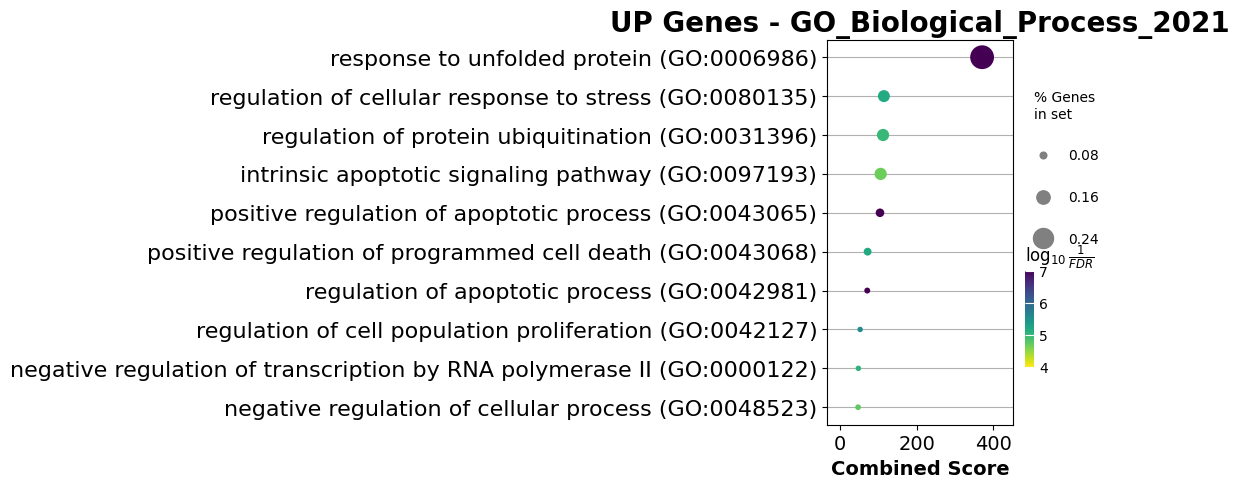

In [31]:
dotplot(enr_up.res2d, title='UP Genes - GO_Biological_Process_2021',cmap='viridis_r', size=10, figsize=(3,5))

In [32]:
# Down-regulated genes, cis vs untrt
enr_down = gp.enrichr(gene_list=gene_names_down,
                 gene_sets=['GO_Biological_Process_2021'],
                 organism='mouse',
                 outdir=None,
                )
enr_res_down = enr_down.results

enr_res_down.loc[enr_res_down['Adjusted P-value'] < .05]

Gene_set  \
0   GO_Biological_Process_2021   
1   GO_Biological_Process_2021   
2   GO_Biological_Process_2021   
3   GO_Biological_Process_2021   
4   GO_Biological_Process_2021   
5   GO_Biological_Process_2021   
6   GO_Biological_Process_2021   
7   GO_Biological_Process_2021   
8   GO_Biological_Process_2021   
9   GO_Biological_Process_2021   
10  GO_Biological_Process_2021   
11  GO_Biological_Process_2021   
12  GO_Biological_Process_2021   
13  GO_Biological_Process_2021   
14  GO_Biological_Process_2021   
15  GO_Biological_Process_2021   
16  GO_Biological_Process_2021   
17  GO_Biological_Process_2021   
18  GO_Biological_Process_2021   
19  GO_Biological_Process_2021   
20  GO_Biological_Process_2021   
21  GO_Biological_Process_2021   
22  GO_Biological_Process_2021   
23  GO_Biological_Process_2021   
24  GO_Biological_Process_2021   
25  GO_Biological_Process_2021   
26  GO_Biological_Process_2021   
27  GO_Biological_Process_2021   
28  GO_Biological_Process_2021   
29  GO_Biological_Process_2021   
30  GO_Biological_Process_2021   
31  GO_Biological_Process_2021   
32  GO_Biological_Process_2021   
33  GO_Biological_Process_2021   
34  GO_Biological_Process_2021   
35  GO_Biological_Process_2021   
36  GO_Biological_Process_2021   

                                                 Term   Overlap       P-value  \
0                protein phosphorylation (GO:0006468)    40/496  1.485191e-07   
1   regulation of intracellular signal transductio...    36/437  3.762979e-07   
2   positive regulation of transcription, DNA-temp...   70/1183  9.596759e-07   
3   positive regulation of nucleic acid-templated ...    38/511  2.217605e-06   
4   positive regulation of transcription by RNA po...    56/908  3.700597e-06   
5   positive regulation of developmental process (...    19/177  5.516672e-06   
6                    filopodium assembly (GO:0046847)      6/16  7.103069e-06   
7                        phosphorylation (GO:0016310)    31/400  8.427616e-06   
8   transcription initiation from RNA polymerase I...    16/140  1.362080e-05   
9   regulation of small GTPase mediated signal tra...    16/141  1.490897e-05   
10   regulation of embryonic development (GO:0045995)      8/36  1.647565e-05   
11          regulation of cell migration (GO:0030334)    30/408  3.190813e-05   
12  plasma membrane bounded cell projection assemb...    23/278  4.456714e-05   
13  regulation of transcription, DNA-templated (GO...  106/2244  5.208554e-05   
14    transcription by RNA polymerase II (GO:0006366)    25/320  5.433523e-05   
15           protein autophosphorylation (GO:0046777)    16/159  6.582621e-05   
16  regulation of plasma membrane bounded cell pro...     10/70  8.602556e-05   
17  positive regulation of cell projection organiz...    13/117  1.151353e-04   
18  positive regulation of lipid metabolic process...      6/25  1.222562e-04   
19    positive regulation of JNK cascade (GO:0046330)     10/73  1.234388e-04   
20  DNA-templated transcription, initiation (GO:00...    16/168  1.266237e-04   
21             regulation of JNK cascade (GO:0046328)    12/105  1.597573e-04   
22  regulation of transcription by RNA polymerase ...  102/2206  1.662453e-04   
23  negative regulation of transcription, DNA-temp...    52/948  1.772982e-04   
24       cellular response to starvation (GO:0009267)    15/158  2.111529e-04   
25  positive regulation of cell migration (GO:0030...    21/269  2.120734e-04   
26  positive regulation of GTPase activity (GO:004...    18/214  2.385072e-04   
27  positive regulation of developmental growth (G...      8/52  2.589616e-04   
28  cellular protein modification process (GO:0006...   54/1025  3.598597e-04   
29         regulation of hippo signaling (GO:0035330)      5/20  3.740733e-04   
30  positive regulation of embryonic development (...      5/20  3.740733e-04   
31                     brain development (GO:0007420)    14/150  4.043654e-04   
32  positive regulation of biosynthetic process (G...   

<Axes: title={'center': 'DOWN Genes - GO_Biological_Process_2021'}, xlabel='Combined Score'>

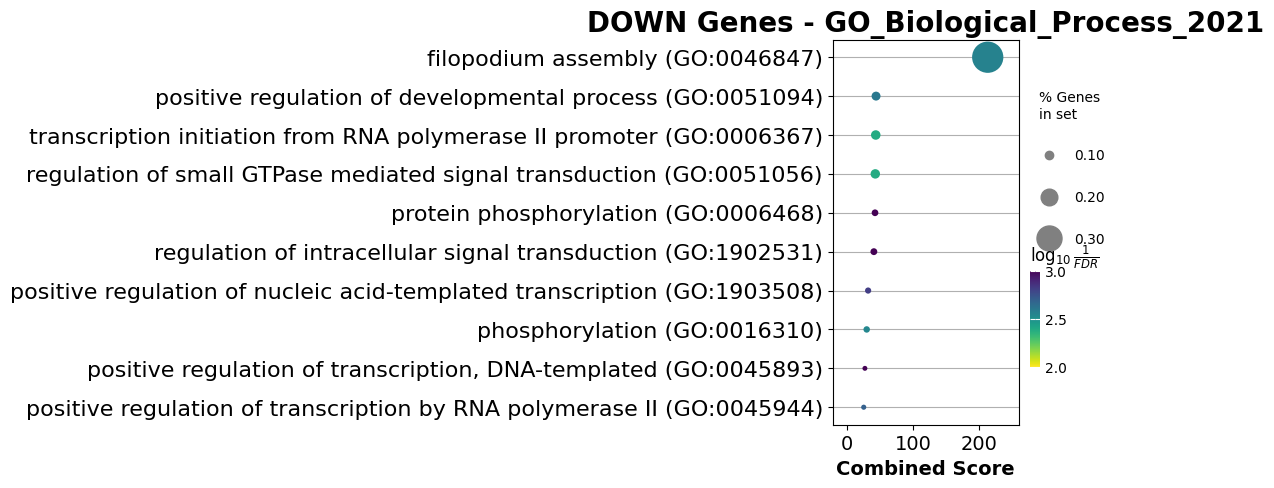

In [33]:
dotplot(enr_down.res2d, title='DOWN Genes - GO_Biological_Process_2021',cmap='viridis_r', size=10, figsize=(3,5))

**Task11:** You have printed the dataframes of signigicant pathways that are enriched in down- and up-regulated genes, seperately. You have also drawn the dotplots of the major pathways associated with them, coming from the respective dataframes.

Inspect the both results while considering biological relevance to cisplatin treatment. What do you think cisplatin caused?

<< WRITE YOUR ANSWER HERE >>


Up-regulated Genes
1. **Response to Unfolded Protein** (GO:0006986) and **Regulation of Cellular Response to Stress** (GO:0080135): Cisplatin may cause cellular stress, leading to protein misfolding. This indicates that the treatment potentially damages proteins or interferes with their proper folding, prompting the cell to increase mechanisms to manage or mitigate these effects.

2. **Regulation of Apoptotic Processes** (several related terms): Several pathways linked to the regulation of apoptosis are activated, suggesting that cisplatin may induce cell death through apoptotic mechanisms.

3. **Negative Regulation of Transcription by RNA Polymerase II** (GO:0000122): This suggests a downregulation or inhibition of general gene expression, which might be a cellular response to DNA damage or stress induced by cisplatin, leading to a reduction in transcriptional activities to conserve resources or prevent propagation of damage.

Down-regulated Genes
1. **Filopodium Assembly** (GO:0046847): The downregulation of genes associated with the assembly of filopodia may indicate alterations in cell morphology and motility, which are crucial in how cancer cells invade and metastasize.

2. **Regulation of Small GTPase Mediated Signal Transduction** (GO:0051056) and related signaling pathways: This decrease might suggest an impairment in signaling pathways that are vital for cell growth and proliferation, aligning with the objective of chemotherapy to halt cancer cell growth.

3. **Positive Regulation of Transcription by RNA Polymerase II** (GO:0045944): This contrasts with the up-regulation seen in negative regulation of transcription by RNA polymerase II in up-regulated genes, indicating a complex modulation of transcriptional activity possibly aimed at shutting down certain cell survival pathways while activating stress response pathways.

The impact of cisplatin, as suggested by these data, appears to be multifaceted but coherent with its role in chemotherapy. It induces stress responses, particularly in protein folding and apoptosis, while also potentially inhibiting processes related to cell proliferation, survival, and motility.

